In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

# palettable default colors
from palettable.cartocolors.qualitative import Prism_8

prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = "#303039"
bg = "white"
lcol = "black"

rainbow = [red, yellow, green, blue, purple]

In [3]:
import os
import pandas as pd
import numpy as np

# Task 1

In [4]:
Cs = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5]
wvlngths = [2, 4, 10, 20]

## Kawamura 1986

In [8]:
def error_k86(C, wvlngth):

    k = 2 * np.pi / wvlngth

    rl = 1 - ((C / 6) * ((3 * np.cos(2 * k)) - (12 * np.cos(k)) + 9))
    im = (C / 6) * (np.sin(2 * k) - (8 * np.sin(k)))

    return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arctan2(im, rl))


error_k86 = np.vectorize(error_k86)

In [9]:
out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_k86(out.C, out.w)

In [10]:
print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

Amplitude
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.996 |  0.960 | 0.600 | 0.200 | 0.200 | 0.600 | 1.000 | 1.400 | 1.800 | 2.200 | 2.600 | 3.000 | 5.000 |
|   4 |   0.999 |  0.990 | 0.910 | 0.843 | 0.806 | 0.803 | 0.833 | 0.894 | 0.980 | 1.085 | 1.204 | 1.333 | 2.062 |
|  10 |   1.000 |  1.000 | 0.998 | 1.001 | 1.007 | 1.017 | 1.030 | 1.048 | 1.068 | 1.092 | 1.119 | 1.149 | 1.332 |
|  20 |   1.000 |  1.000 | 1.000 | 1.001 | 1.004 | 1.007 | 1.011 | 1.016 | 1.022 | 1.029 | 1.037 | 1.046 | 1.102 |

Phase Speed
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.000 |  0.000 | 0.000 | 0.000 | 3.333 | 2.500 

## Agarwal 1981

In [ ]:
def error_a81(C, wvlngth):

    k = 2 * np.pi / wvlngth

    rl = 1 - ((C / 6) * (np.cos(2 * k) - (4 * np.cos(k)) + 3))
    im = (C / 6) * (np.sin(2 * k) - (8 * np.sin(k)))

    return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arctan2(im, rl))


error_a81 = np.vectorize(error_a81)

In [ ]:
out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_a81(out.C, out.w)

print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

Amplitude
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.999 |  0.987 | 0.867 | 0.733 | 0.600 | 0.467 | 0.333 | 0.200 | 0.067 | 0.067 | 0.200 | 0.333 | 1.000 |
|   4 |   1.000 |  0.997 | 0.976 | 0.971 | 0.985 | 1.018 | 1.067 | 1.131 | 1.208 | 1.294 | 1.389 | 1.491 | 2.062 |
|  10 |   1.000 |  1.000 | 1.001 | 1.005 | 1.014 | 1.026 | 1.042 | 1.061 | 1.084 | 1.109 | 1.138 | 1.169 | 1.358 |
|  20 |   1.000 |  1.000 | 1.000 | 1.002 | 1.004 | 1.008 | 1.012 | 1.017 | 1.023 | 1.030 | 1.038 | 1.047 | 1.104 |

Phase Speed
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.000 |  0.000 | 0.000 | 0.000 | 0.000 | 0.000 

# Task 2: forward-in-time centered-in-space

In [ ]:
def calc_c(U, dt, dx):
    return U * dt / dx

In [ ]:
U = 1
dx = 1
dt = 1

print(f"C={calc_c(U,dt,dx)}")

nx = 102  # number of x points (real points = nx-2)
nt = 100
w = ((nx - 2) / 5) * dx
k = 2 * np.pi / w

print(f"wavelength = {w}, k = {k/np.pi}*pi")

C=1.0
wavelength = 20.0, k = 0.1*pi


In [ ]:
# Initialize arrays
xs = np.arange(nx)
phi_diff = np.empty((nt, nx))

# initial timestep
phi_diff[0] = np.cos(k * xs)

for it in range(nt - 1):
    for ix in range(nx - 1):
        # forward in time centered in space integration
        phi_diff[it + 1, ix] = phi_diff[it, ix] + (
            -U * (phi_diff[it, ix + 1] - phi_diff[it, ix - 1]) / (2 * dx)
        )

        # apply cyclic boundary conditions
        phi_diff[it + 1, 0] = phi_diff[it + 1, nx - 2]
        phi_diff[it + 1, nx - 1] = phi_diff[it + 1, 1]

# Calculate analytic solution
phi_ana = np.empty((nt, nx))

for it in range(nt - 1):
    phi_ana[it] = np.cos(k * (xs - (U * it)))

Text(0.0, 1.0, '(b) Analytic Solution')

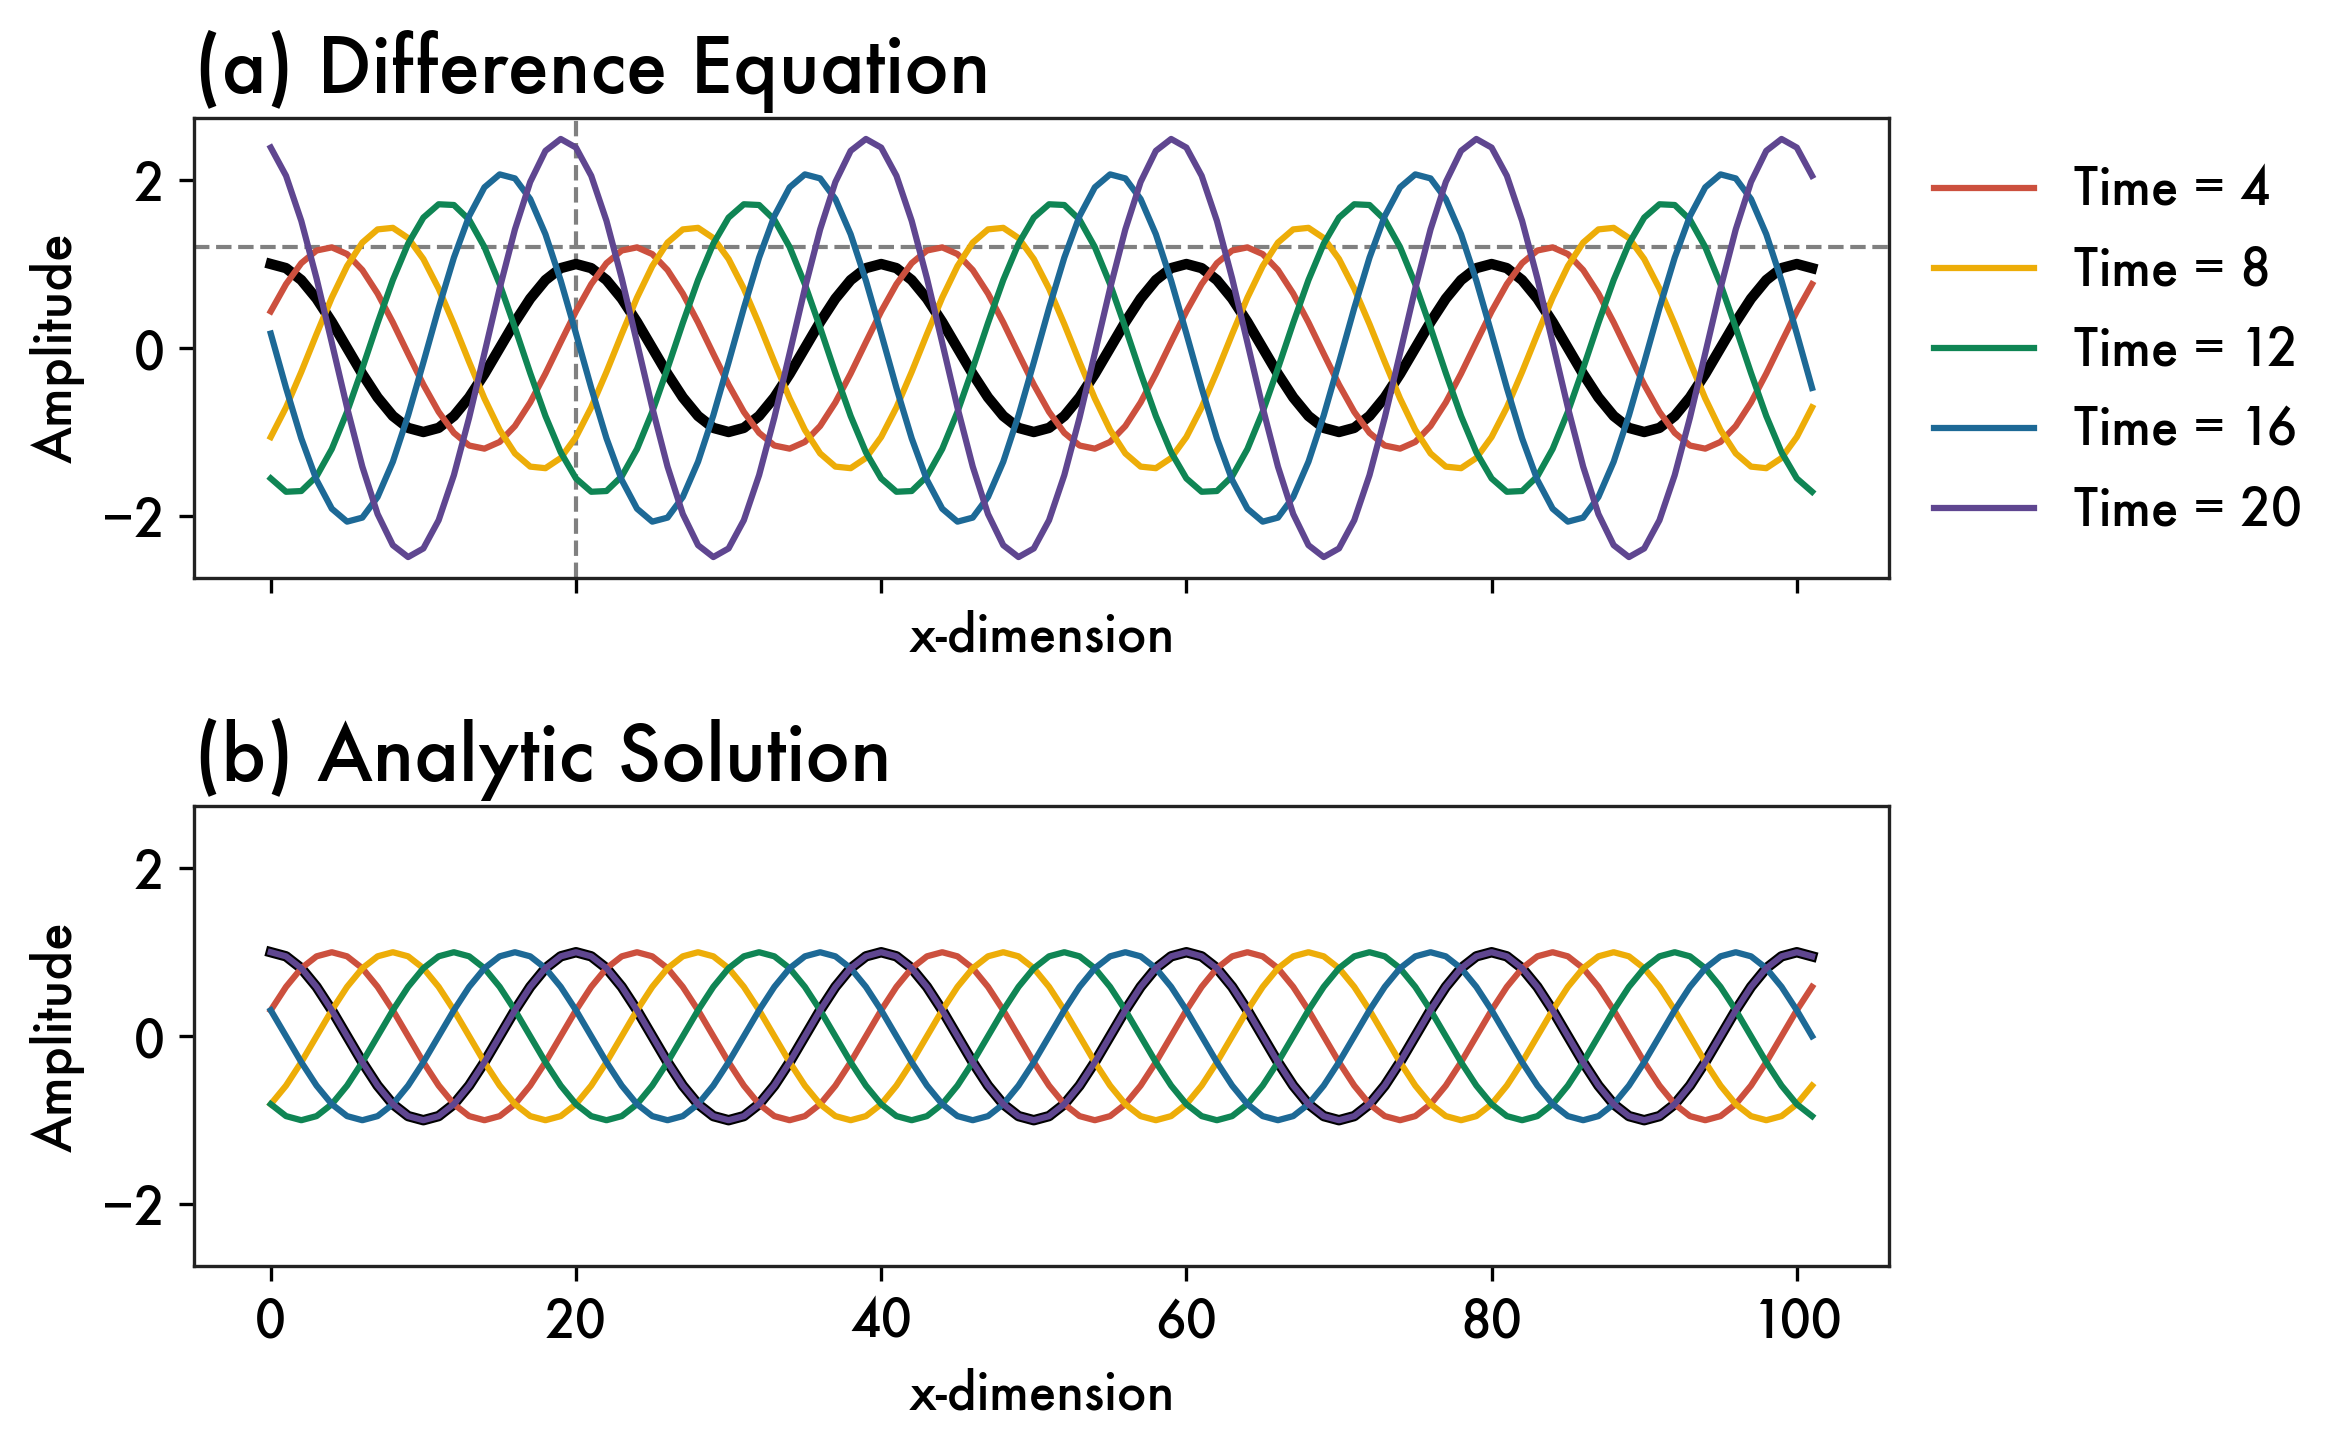

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 5), sharex=True, sharey=True)

axes[0].plot(xs, phi_diff[0], color="black")
axes[1].plot(xs, phi_ana[0], color="black")

for it, col in zip(range(4, nt - 1)[::4], rainbow):
    axes[0].plot(
        xs, phi_diff[it], color=col, label=f"Time = {it}", linewidth=1.5
    )
    axes[1].plot(
        xs, phi_ana[it], color=col, label=f"Time = {it}", linewidth=1.5
    )

axes[0].legend(bbox_to_anchor=(1, 1))

for ax in axes:
    ax.set_xlabel("x-dimension")
    ax.set_ylabel("Amplitude")

axes[0].axhline((1.047) ** 4, zorder=0, lw=1, ls="--", color="gray")
axes[0].axvline(20, zorder=0, lw=1, ls="--", color="gray")

axes[0].set_title("(a) Difference Equation")
axes[1].set_title("(b) Analytic Solution")

## Theoretical Error Computation

In [ ]:
def error_ftcs(C, wvlngth):

    k = 2 * np.pi / wvlngth

    rl = 1
    im = -C * np.sin(k)

    return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arctan2(im, rl))


error_ftcs = np.vectorize(error_ftcs)

out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_ftcs(out.C, out.w)

print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

Amplitude
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   1.000 |  1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 | 1.000 |
|   4 |   1.000 |  1.000 | 1.005 | 1.020 | 1.044 | 1.077 | 1.118 | 1.166 | 1.221 | 1.281 | 1.345 | 1.414 | 1.803 |
|  10 |   1.000 |  1.000 | 1.002 | 1.007 | 1.015 | 1.027 | 1.042 | 1.060 | 1.081 | 1.105 | 1.131 | 1.160 | 1.333 |
|  20 |   1.000 |  1.000 | 1.000 | 1.002 | 1.004 | 1.008 | 1.012 | 1.017 | 1.023 | 1.030 | 1.038 | 1.047 | 1.102 |

Phase Speed
|   w |   0.001 |   0.01 |   0.1 |   0.2 |   0.3 |   0.4 |   0.5 |   0.6 |   0.7 |   0.8 |   0.9 |   1.0 |   1.5 |
|----:|--------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
|   2 |   0.000 |  0.000 | 0.000 | 0.000 | 0.000 | 0.000 

# Task 3: Forward upstream

In [ ]:
dx = 1
dt = 1


nx = 102  # number of x points (real points = nx-2)
nt = 1000
w = ((nx - 2) / 5) * dx
k = 2 * np.pi / w

print(f"wavelength = {w}, k = {k/np.pi}*pi")

wavelength = 20.0, k = 0.1*pi


In [ ]:
def propagate_fu(U, k, nx, nt, dx):
    # Initialize arrays
    xs = np.arange(nx) * dx
    phi_diff = np.empty((nt, nx))

    # initial timestep
    phi_diff[0] = np.cos(k * xs)

    for it in range(nt - 1):
        for ix in range(nx - 1):
            # forward in time centered in space integration
            phi_diff[it + 1, ix] = phi_diff[it, ix] + (
                -U * (phi_diff[it, ix] - phi_diff[it, ix - 1]) / (dx)
            )

            # apply cyclic boundary conditions
            phi_diff[it + 1, 0] = phi_diff[it + 1, nx - 2]
            phi_diff[it + 1, nx - 1] = phi_diff[it + 1, 1]

    return phi_diff

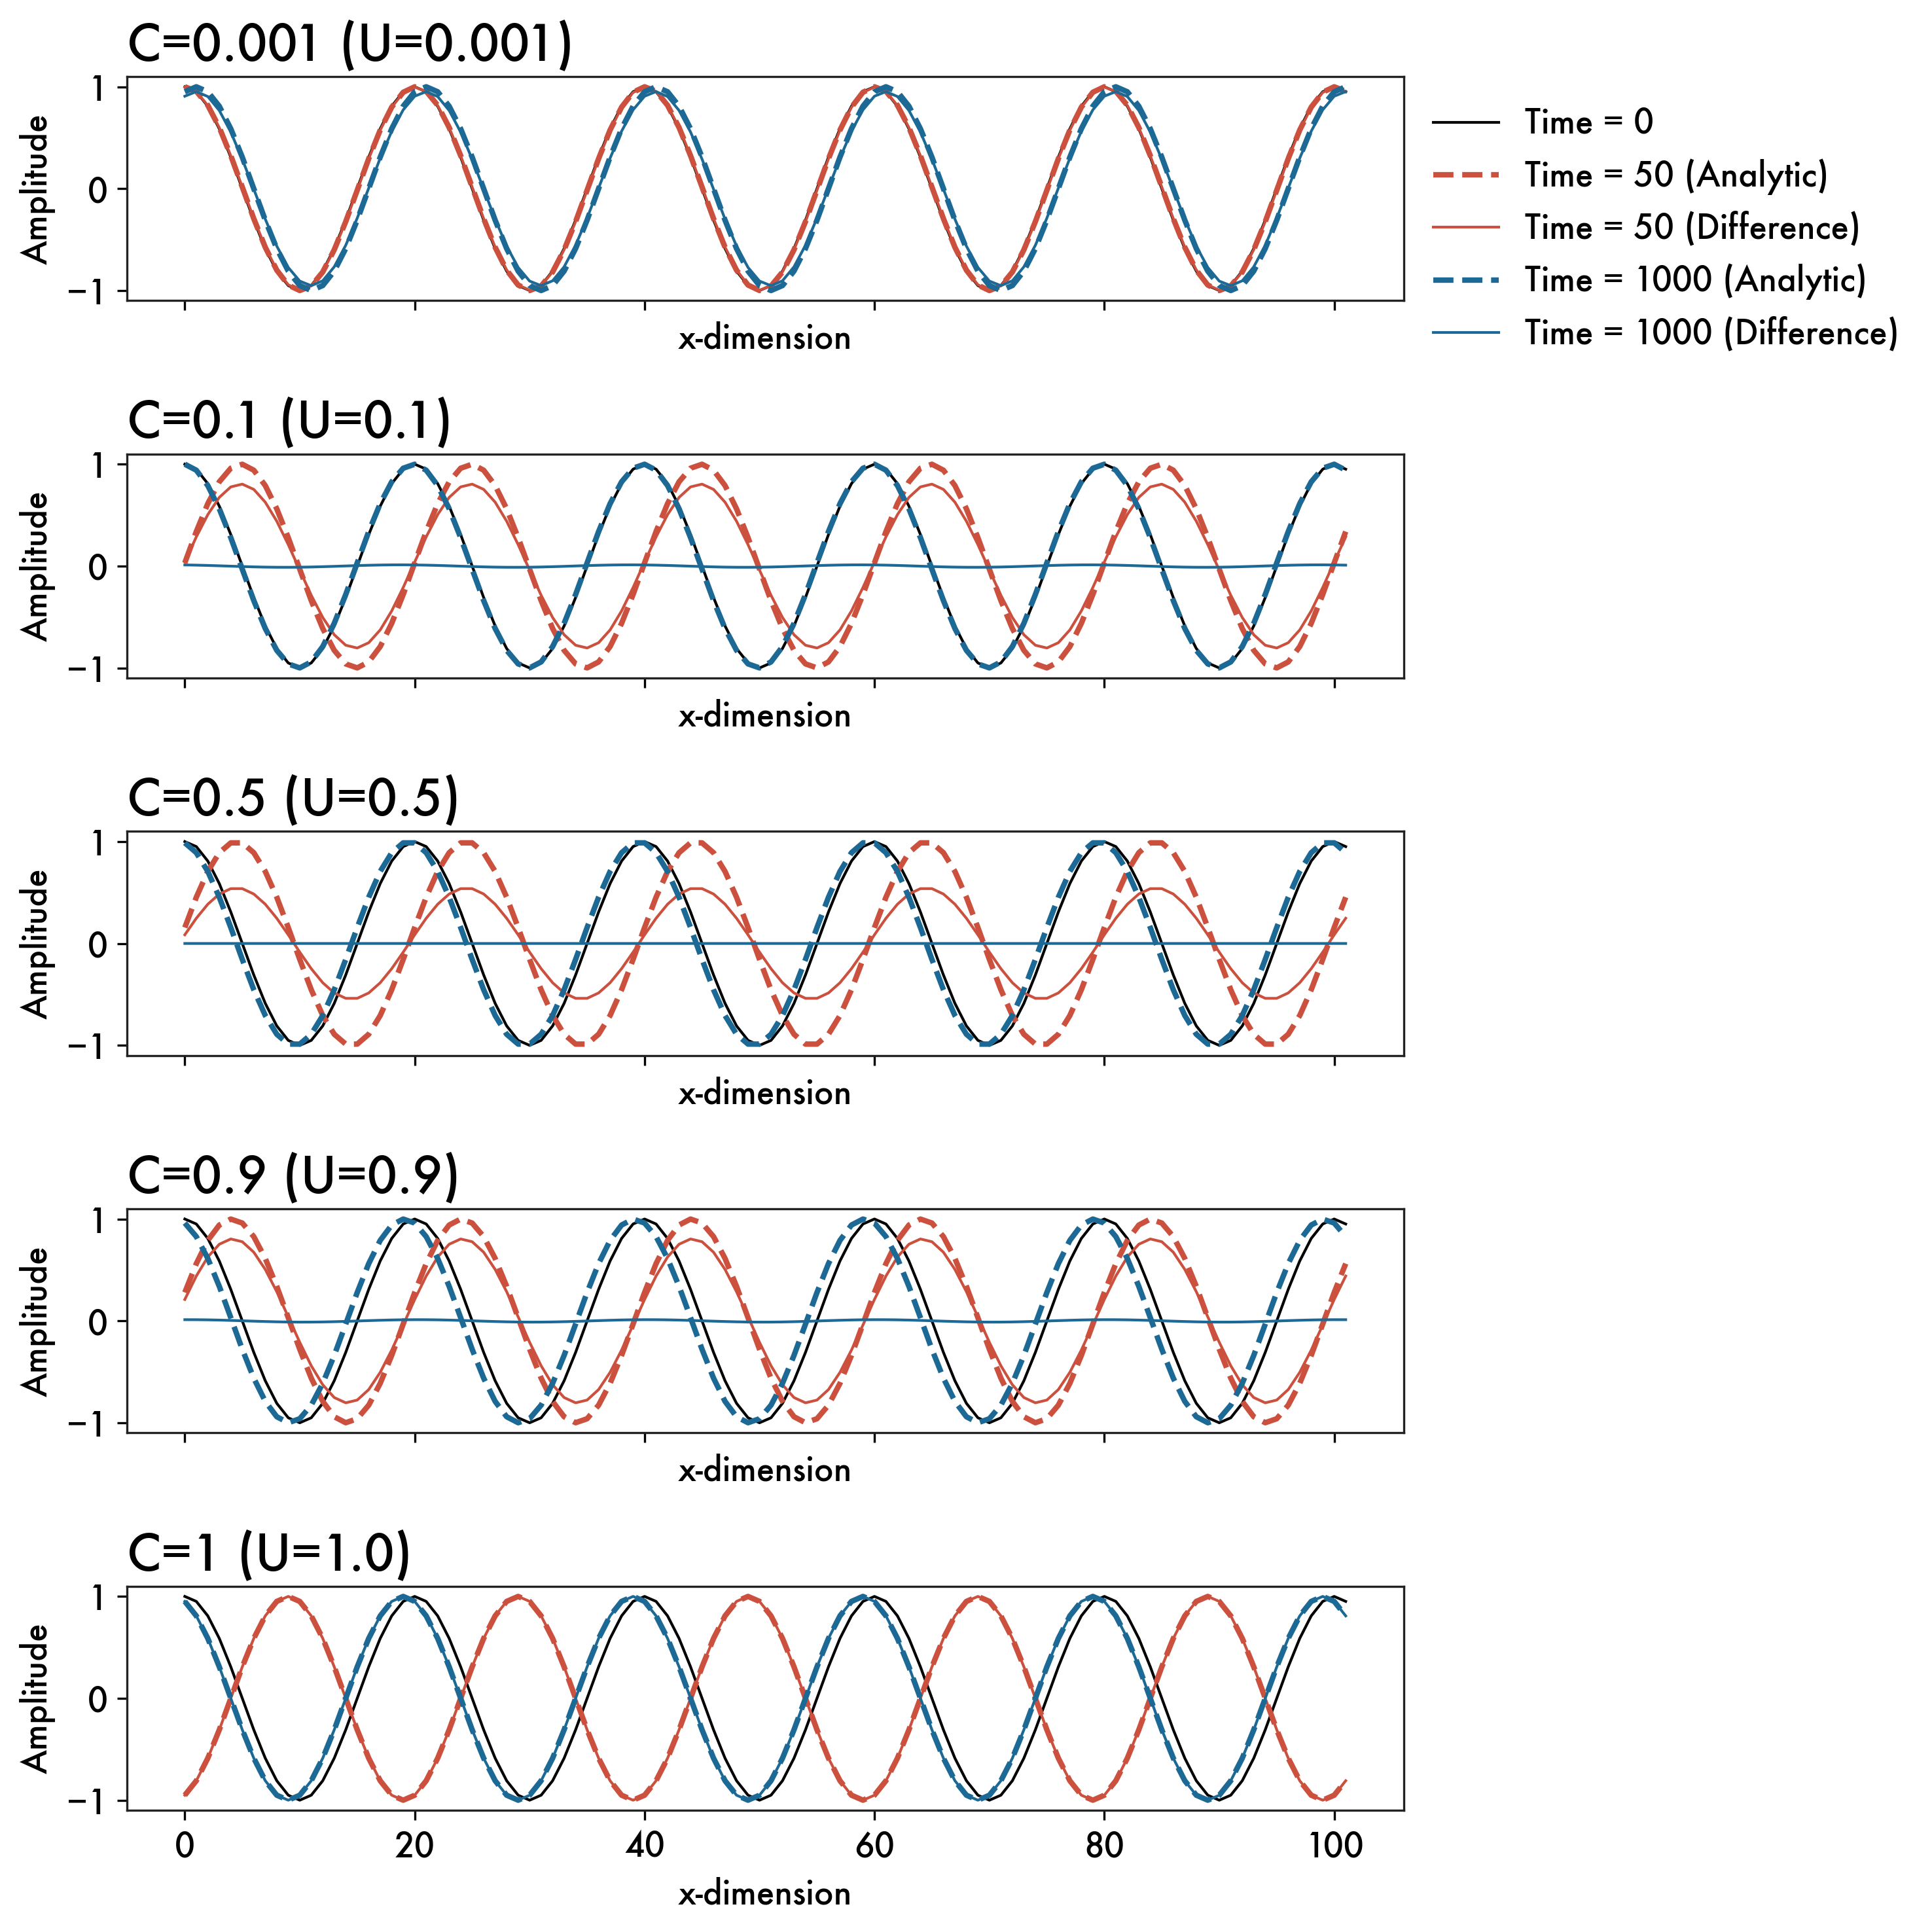

In [625]:
fig, axes = plt.subplots(5, 1, sharex=True, sharey=True, figsize=(10, 10))

nx = 102
nt = 1000
w = ((nx - 2) / 5) * dx
k = 2 * np.pi / w
xs = np.arange(nx) * dx

for ax, C in zip(axes, [0.001, 0.1, 0.5, 0.9, 1]):
    U = C * dx / dt
    ax.set_title(f"C={C} (U={U})")

    diff = propagate_fu(U, k, nx, nt, dx)

    ax.plot(xs, diff[0], color="black", lw=1, label="Time = 0")

    for nt, col in zip([50, 1000], [red, blue]):
        ax.plot(
            xs,
            np.cos(k * (xs - (U * (nt - 1)))),
            color=col,
            lw=2,
            ls="--",
            label=f"Time = {nt} (Analytic)",
        )
        ax.plot(
            xs, diff[nt - 1], color=col, lw=1, label=f"Time = {nt} (Difference)"
        )


axes[0].legend(bbox_to_anchor=(1, 1))

for ax in axes:
    ax.set_xlabel("x-dimension")
    ax.set_ylabel("Amplitude")

22
22
22
22


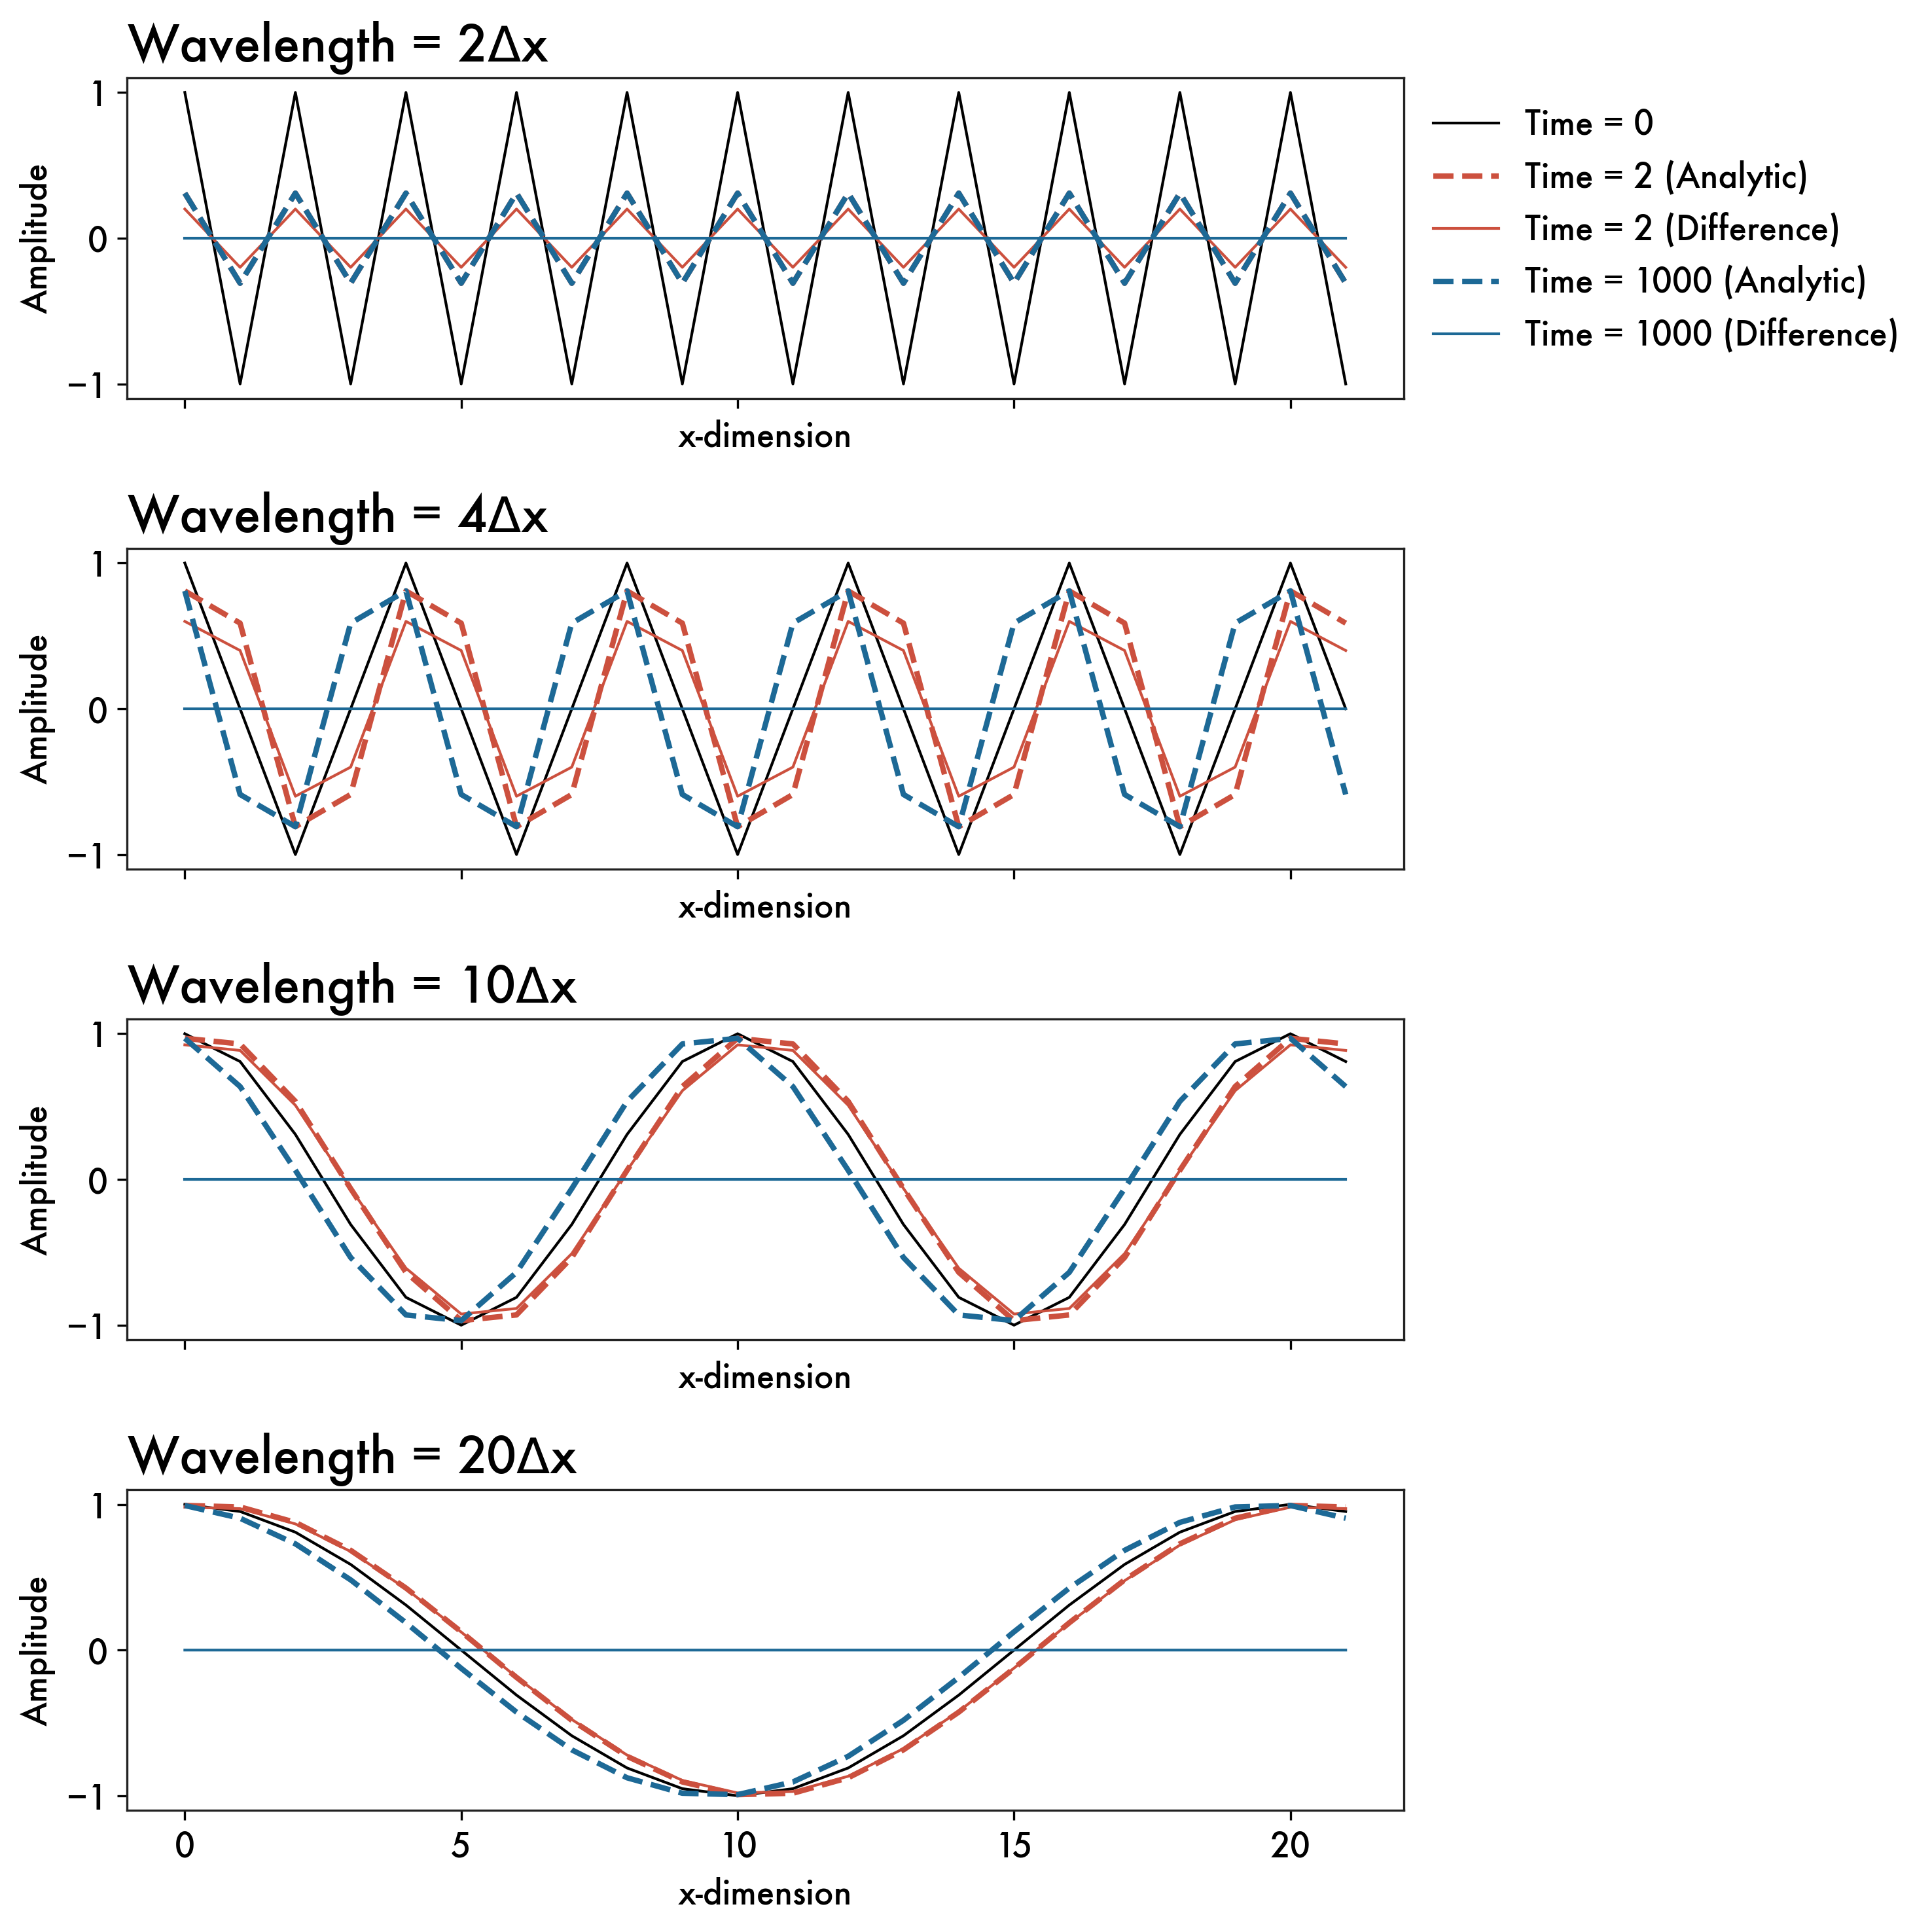

In [634]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(10, 10))

nx = 22
nt = 1000
dx = 1
C = 0.4
U = C * dx / dt

for ax, w in zip(axes, [2, 4, 10, 20]):
    print(nx)
    k = 2 * np.pi / w
    xs = np.arange(nx) * dx
    ax.set_title(f"Wavelength = {w}$\Delta$x")

    diff = propagate_fu(U, k, nx, nt, dx)

    ax.plot(xs, diff[0], color="black", lw=1, label="Time = 0")

    for nt, col in zip([2, 1000], [red, blue]):
        ax.plot(
            xs,
            np.cos(k * (xs - (U * (nt - 1)))),
            color=col,
            lw=2,
            ls="--",
            label=f"Time = {nt} (Analytic)",
        )
        ax.plot(
            xs, diff[nt - 1], color=col, lw=1, label=f"Time = {nt} (Difference)"
        )


axes[0].legend(bbox_to_anchor=(1, 1))

for ax in axes:
    ax.set_xlabel("x-dimension")
    ax.set_ylabel("Amplitude")

## Task 3.2

In [ ]:
import pandas as pd
import numpy as np


Cs = [
    0.001,
    0.01,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    1.0,
    1.5,
]
ws = [2, 4, 10, 20]

##

In [318]:
dx = 1
dt = 1
nt = 100

out_diff = pd.DataFrame(
    columns=Cs,
    index=ws,
)
out_diff_1000 = pd.DataFrame(
    columns=Cs,
    index=ws,
)
out_ana = pd.DataFrame(
    columns=Cs,
    index=ws,
)

for C in Cs:
    for w in ws:
        w = w * dx
        nx = int((w / dx) + 2)

        xs = np.arange(nx) * dx

        k = 2 * np.pi / w
        U = C * dx / dt

        diff = propagate_fu(U, k, nx, nt, dx)

        out_diff.loc[w, C] = (
            diff.max(axis=1)[1:] ** (1 / np.arange(1, nt))
        ).mean()  # diff[nt - 1].max() ** (1 / nt)
        out_ana.loc[w, C] = error_fu(C, w)[0]

        diff = propagate_fu(U, k, nx, 1000, dx)

        out_diff_1000.loc[w, C] = np.nanmean(
            diff.max(axis=1)[1:] ** (1 / np.arange(1, 1000))
        )  # diff[nt - 1].max() ** (1 / nt)

print("Difference Equation (t=100)")
print(
    out_diff.to_markdown(
        tablefmt="rounded_grid", missingval="-", floatfmt=".3f"
    )
)
print("")
print("Difference Equation (t=1000)")
print(
    out_diff_1000.replace(np.nan, None).to_markdown(
        tablefmt="rounded_grid", missingval="-", floatfmt=".3f"
    ),
)
print("")
print("Analytic Solution")
print(
    out_ana.to_markdown(tablefmt="rounded_grid", missingval="-", floatfmt=".3f")
)

/tmp/ipykernel_1543613/2105993797.py:38: RuntimeWarning: invalid value encountered in power
  diff.max(axis=1)[1:] ** (1 / np.arange(1, 1000))


Difference Equation (t=100)
╭────┬─────────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────╮
│    │   0.001 │   0.01 │   0.1 │   0.2 │   0.3 │   0.4 │   0.5 │   0.6 │   0.7 │   0.8 │   0.9 │   1.0 │   1.5 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  2 │   0.998 │  0.980 │ 0.800 │ 0.600 │ 0.400 │ 0.200 │ 0.000 │ 0.200 │ 0.400 │ 0.600 │ 0.800 │ 1.000 │ 2.000 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  4 │   0.999 │  0.988 │ 0.901 │ 0.820 │ 0.757 │ 0.717 │ 0.700 │ 0.717 │ 0.757 │ 0.820 │ 0.901 │ 1.000 │ 1.572 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 10 │   1.000 │  0.998 │ 0.982 │ 0.968 │ 0.958 │ 0.952 │ 0.950 │ 0.952 │ 0.958 │ 0.968 │ 0.982 │ 1.000 │ 1.159 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───

In [ ]:
((np.diff(diff[1:-1].argmax(axis=1)) % (nx - 2)).mean() / U) ** (1 / nt)

1.0007385254413181

In [621]:
dx = 1
dt = 1
nt = 50000

out_diff = pd.DataFrame(
    columns=Cs,
    index=ws,
)
out_diff_100 = pd.DataFrame(
    columns=Cs,
    index=ws,
)
out_diff_1000 = pd.DataFrame(
    columns=Cs,
    index=ws,
)
out_ana = pd.DataFrame(
    columns=Cs,
    index=ws,
)

for C in Cs:
    for w in ws:
        nx = int((w / dx) + 2)

        xs = np.arange(nx) * dx

        k = 2 * np.pi / w
        U = C * dx / dt

        diff = propagate_fu(U, k, nx, nt, dx)

        out_diff.loc[w, C] = (
            np.minimum(
                np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
                -np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
            )
        ).mean() / U

        diff = propagate_fu(U, k, nx, 1000, dx)

        out_diff_1000.loc[w, C] = (
            np.minimum(
                np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
                -np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
            )
        ).mean() / U

        diff = propagate_fu(U, k, nx, 100, dx)

        out_diff_100.loc[w, C] = (
            np.minimum(
                np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
                -np.diff(diff[diff.max(axis=1) > 0][:, 1:-1].argmax(axis=1))
                % (nx - 2),
            )
        ).mean() / U

        out_ana.loc[w, C] = error_fu(C, w)[1]

print("Difference Equation (t=100)")
print(
    out_diff_100.replace(np.nan, None).to_markdown(
        tablefmt="rounded_grid", missingval="-", floatfmt=".3f"
    )
)
print("")
print("Difference Equation (t=1000)")
print(
    out_diff_1000.replace(np.nan, None).to_markdown(
        tablefmt="rounded_grid", missingval="-", floatfmt=".3f"
    )
)
print("")
print("Difference Equation (t=50000)")
print(
    out_diff.replace(np.nan, None).to_markdown(
        tablefmt="rounded_grid", missingval="-", floatfmt=".3f"
    )
)

print("")
print("Analytic Solution")
print(
    out_ana.to_markdown(tablefmt="rounded_grid", missingval="-", floatfmt=".3f")
)

/tmp/ipykernel_1543613/1664732423.py:40: RuntimeWarning: Mean of empty slice.
  ).mean() / U
/home/gleung/miniforge3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1543613/1664732423.py:51: RuntimeWarning: Mean of empty slice.
  ).mean() / U
/tmp/ipykernel_1543613/1664732423.py:62: RuntimeWarning: Mean of empty slice.
  ).mean() / U
/tmp/ipykernel_1543613/3133329305.py:13: RuntimeWarning: overflow encountered in scalar subtract
  -U * (phi_diff[it, ix] - phi_diff[it, ix - 1]) / (dx)
/tmp/ipykernel_1543613/3133329305.py:12: RuntimeWarning: invalid value encountered in scalar add
  phi_diff[it + 1, ix] = phi_diff[it, ix] + (
/tmp/ipykernel_1543613/3133329305.py:13: RuntimeWarning: overflow encountered in scalar multiply
  -U * (phi_diff[it, ix] - phi_diff[it, ix - 1]) / (dx)


Difference Equation (t=100)
╭────┬─────────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────╮
│    │   0.001 │   0.01 │   0.1 │   0.2 │   0.3 │   0.4 │   0.5 │   0.6 │   0.7 │   0.8 │   0.9 │   1.0 │   1.5 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  2 │   0.000 │  0.000 │ 0.000 │ 0.000 │ 0.000 │ 0.000 │ -     │ 1.667 │ 1.429 │ 1.250 │ 1.111 │ 1.000 │ 0.667 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│  4 │   0.000 │  1.010 │ 0.707 │ 0.758 │ 0.875 │ 0.934 │ 1.010 │ 1.044 │ 1.053 │ 1.061 │ 1.033 │ 1.000 │ 0.801 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 10 │   0.000 │  1.010 │ 0.909 │ 0.960 │ 0.976 │ 0.985 │ 1.010 │ 1.010 │ 1.010 │ 1.010 │ 1.010 │ 1.000 │ 0.869 │
├────┼─────────┼────────┼───────┼───────┼───────┼───────┼───

## Error Computation

In [587]:
def error_fu(C, wvlngth):

    k = 2 * np.pi / wvlngth

    rl = 1 - C * (1 - np.cos(k))
    im = -C * np.sin(k)

    return ((rl**2 + im**2) ** (1 / 2), -(1 / (k * C)) * np.arctan2(im, rl))


error_fu = np.vectorize(error_fu)

out = pd.DataFrame(
    index=pd.MultiIndex.from_product([Cs, wvlngths], names=["C", "w"])
).reset_index()

out["amp"], out["phs"] = error_fu(out.C, out.w)

print("Amplitude")
print(
    out.pivot(index="w", columns="C", values="amp").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)
print("")
print("Phase Speed")
print(
    out.pivot(index="w", columns="C", values="phs").to_markdown(
        tablefmt="pipe", floatfmt=".3f"
    )
)

NameError: name 'wvlngths' is not defined